# Unidad 2: Modelos de regresión

Importar librerías básicas

In [1]:
# Import basic libraries
import numpy as np
import matplotlib.pyplot as plt
import scipy


## Problema 1: Modelo Lineal 

### 1.- Procesamiento de los datos

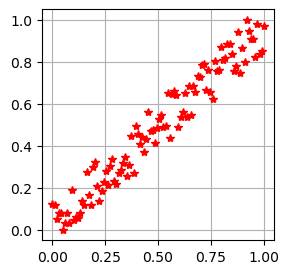

In [2]:
#Cargar datos
data = scipy.io.loadmat('datos/data_1.mat')

#Extraer valores
x = data['x']
y = data['y']

#Normalize values
y = y - np.min(y)
y = y / np.max(y)

#Imprimir valores
plt.figure(1, figsize=(3, 3))
plt.plot(x, y, '*', color='red');
plt.grid()

### 2.- Definición del modelo

In [154]:
class error_funcions():

    # Cuadratic error mean
    def cme(y,yd):
        e = 0.5*np.power(y-yd,2)
        return e

In [155]:
# crate linear model class
class Lineal():

    #Constructor
    def __init__(self, a,b):
        #define atributes
        self.a = a
        self.b = b

    # Processing (move forward)
    def forward(self, x):

        # calculate the output using parameters
        ym = self.a * x + self.b
        return ym

    #Train 
    def train(self, x, yd, Lr, epochs):
        # Initialize training error 
        self.e = np.zeros(epochs)

        # Epochs cicle: times that model will see all data
        for i in range(epochs):

            # Data cicle: times that model will adjust parameters vs input data
            for j in range(x.shape[1]):

                # Get input j
                x_in = x[0,j]
                y_d = yd[0,j]

                # Get output model
                ym = self.forward(x_in)

                # Calculate iteration error                
                self.e[i] += error_funcions.cme(y_d, ym)

                # Calculate partial derivatives
                de_ym = ym - y_d
                dym_a = x_in
                dym_b = 1.0

                # calculate gradients
                de_a = de_ym * dym_a
                de_b = de_ym * dym_b

                # Update parameters model
                self.a = self.a - Lr * de_a
                self.b = self.b - Lr * de_b
            
            # Mean epoch error
            self.e[i] = self.e[i] / x.shape[1]

### 3.- Entrenamiento del modelo

In [156]:
# create instance model
model = Lineal(0.5, 0.5)

 Y =  0.9258189176355721 X +  0.029566787451708234


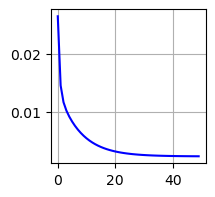

In [157]:
# Train model
model.train(x, y, 0.01, 50)

# Founded parameters
print(" Y = ", model.a, "X + ", model.b)

plt.figure(2, figsize=(2, 2))
plt.plot(model.e, color='blue')
plt.grid()

Cuadratic error mean:  0.002226144390055238


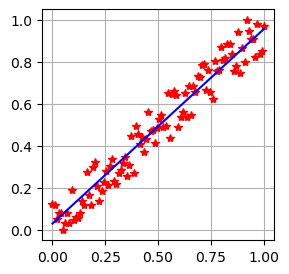

In [158]:
# model output
ym = np.zeros(y.shape)

# process x
for i in range(x.shape[1]):
    # get output model
    ym[0,i] = model.forward(x[0,i])

#Calculate error
e = np.mean(error_funcions.cme(ym,y))
print("Cuadratic error mean: ", e)

#Imprimir valores
plt.figure(1, figsize=(3, 3))
plt.plot(x, y, '*', color='red');
plt.plot(x[0,:], ym[0,:], color='blue');
plt.grid()

### 4.- Evaluación del modelo

## Problema 2: Modelo cuadrático

### 1.- Procesamiento de los datos

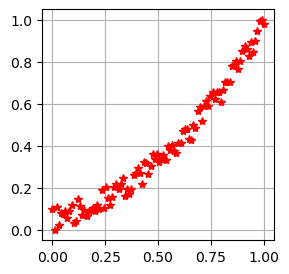

In [159]:
#Cargar datos
data = scipy.io.loadmat('./datos/data_2.mat')

#Extraer valores
x = data['x']
y = data['y']

#Normalize values
y = y - np.min(y)
y = y / np.max(y)

#Imprimir valores
plt.figure(2, figsize=(3, 3))
plt.plot(x, y, '*', color='red');
plt.grid()

### 2.- Definición del modelo

In [160]:
class Cuadratic():

    # Constructor
    def __init__(self, a,b,c):
        # define atributes
        self.a = a
        self.b = b
        self.c = c

    # Processing (move forward)
    def forward(self, x):
        # calculate the output using parameters
        ym = self.a * np.power(x,2) + self.b * x + self.c
        return ym
    
    # Train
    def train(self, x, yd, Lr, epochs):
        # Initialize training error 
        self.e = np.zeros(epochs)

        # Epochs cicle: times that model will see all data
        for i in range(epochs):

            # Data cicle: times that model will adjust parameters vs input data
            for j in range(x.shape[1]):

                # Get input j
                x_in = x[0,j]
                y_d = yd[0,j]

                # Get output model
                ym = self.forward(x_in)

                # Calculate iteration error                
                self.e[i] += error_funcions.cme(ym, y_d)

                # Calculate partial derivatives
                de_ym = ym - y_d
                dym_a = np.power(x_in,2)
                dym_b = x_in
                dym_c = 1.0

                # calculate gradients
                de_a = de_ym * dym_a
                de_b = de_ym * dym_b
                de_c = de_ym * dym_c

                # Update parameters model
                self.a = self.a - Lr * de_a
                self.b = self.b - Lr * de_b
                self.c = self.c - Lr * de_c
            
            # Mean epoch error
            self.e[i] = self.e[i] / x.shape[1]

### 3.- Entrenamiento del modelo

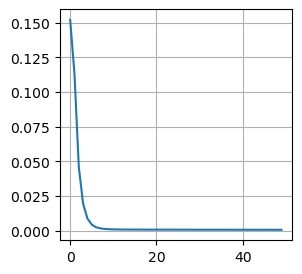

In [161]:
# Create Instance model
junior_con_chochos = Cuadratic(2, 3, 2)

# Train model
junior_con_chochos.train(x, y, 0.1, 50)

# Show training parabola
plt.figure(2, figsize=(3, 3))
plt.plot(junior_con_chochos.e);
plt.grid()

### 4.- Evaluación del modelo

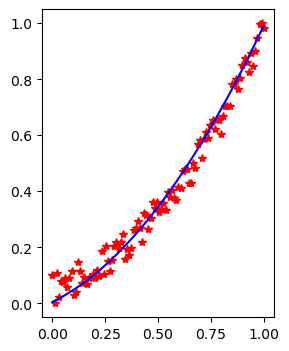

In [162]:
# Initialize model output
ym = np.zeros(y.shape)

# process x
for i in range(x.shape[1]):
    # get output model
    ym[0,i] = junior_con_chochos.forward(x[0,i])

# Graph
plt.figure(3, figsize=(3, 4))
plt.plot(x, y, '*', color='red');
plt.plot(x[0,:], ym[0,:], color='blue');

## Problema 3: Modelo cúbico

### 1.- Procesamiento de los datos

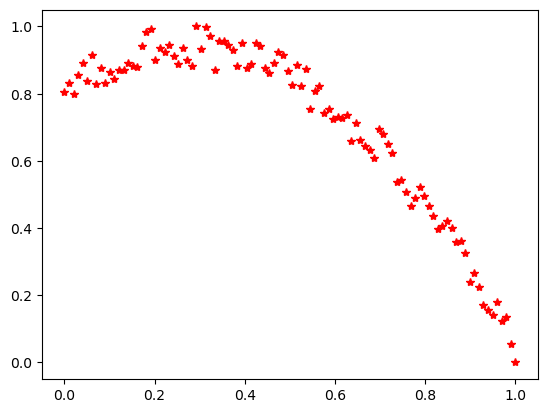

In [163]:
#Cargar datos
data = scipy.io.loadmat('datos/data_3.mat')

#Extraer valores
x = data['x']
y = data['y']

#Normalize values
y = y - np.min(y)
y = y / np.max(y)

#Imprimir valores
plt.plot(x, y, '*', color='red');

### 2.- Definición del modelo

In [164]:
class Cubic():

    # Constructor
    def __init__(self, a,b,c,d):
        # define atributes
        self.a = a
        self.b = b
        self.c = c
        self.d = d

    # Processing (move forward)
    def forward(self, x):
        # calculate the output using parameters
        ym = self.a * np.power(x,3) + self.b * np.power(x,2) + self.c * x + self.d
        return ym
    
    # Train
    def train(self, x, yd, Lr, epochs):
        # Initialize training error 
        self.e = np.zeros(epochs)

        # Epochs cicle: times that model will see all data
        for i in range(epochs):

            # Data cicle: times that model will adjust parameters vs input data
            for j in range(x.shape[1]):

                # Get input j
                x_in = x[0,j]
                y_d = yd[0,j]

                # Get output model
                ym = self.forward(x_in)

                # Calculate iteration error                
                self.e[i] += error_funcions.cme(ym, y_d)

                # Calculate partial derivatives
                de_ym = ym - y_d
                dym_a = np.power(x_in,3)
                dym_b = np.power(x_in,2)
                dym_c = x_in
                dym_d = 1.0

                # calculate gradients
                de_a = de_ym * dym_a
                de_b = de_ym * dym_b
                de_c = de_ym * dym_c
                de_d = de_ym * dym_d

                # Update parameters model
                self.a = self.a - Lr * de_a
                self.b = self.b - Lr * de_b
                self.c = self.c - Lr * de_c
                self.d = self.d - Lr * de_d
            
            # Mean epoch error
            self.e[i] = self.e[i] / x.shape[1]

### 3.- Entrenamiento del modelo

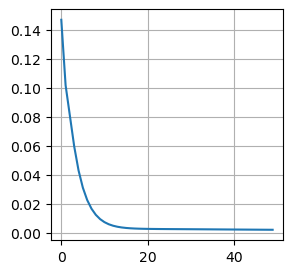

In [165]:
junior_recargado = Cubic(0.5,0.5,0.5,0.5)
junior_recargado.train(x, y, 0.01, 50)

# Show training parabola
plt.figure(2, figsize=(3, 3))
plt.plot(junior_recargado.e);
plt.grid()

### 4.- Evaluación del modelo

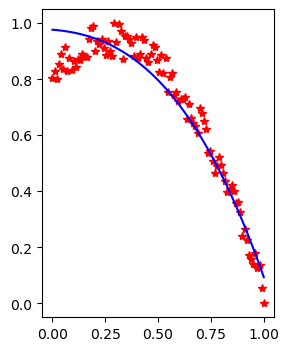

In [166]:
# Initialize model output
ym = np.zeros(y.shape)

# process x
for i in range(x.shape[1]):
    # get output model
    ym[0,i] = junior_recargado.forward(x[0,i])

# Graph
plt.figure(3, figsize=(3, 4))
plt.plot(x, y, '*', color='red');
plt.plot(x[0,:], ym[0,:], color='blue');